In [70]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import matplotlib

%matplotlib inline

df = pd.read_csv('telco.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


3     7795_CFOCW
13    0280_XJGEX
24    6322_HRPFA
26    6467_CHFZW
37    6572_ADKRS
Name: customerID, dtype: object


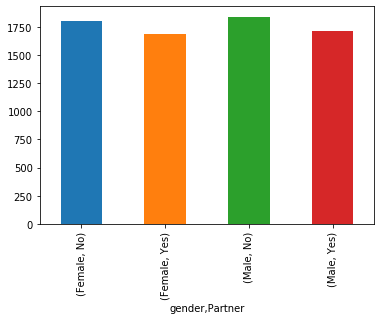

In [66]:
df.groupby(["gender", "Partner"]).count()

df.groupby(["gender", "Partner"]).size().plot(kind="bar")


df_tenure_gt_40 = df[(df.tenure>40) & (df.tenure<50)]
#df.count()
df_fil = df_tenure_gt_40[['customerID','tenure']]
df_fil.head()

df_fil = df_fil.customerID.apply(lambda x: x.replace('-','_'))

print(df_fil.head())

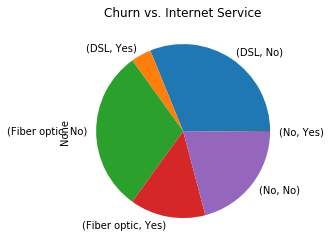

In [62]:
#df_churn_by_service = df[['churn', 'InternetService']]
df_tenure_gt_40.groupby(['InternetService', 'Churn']).size().plot(kind='pie', title='Churn vs. Internet Service', legend=False, use_index=False)

df_tenure_gt_40.to_excel('out.xlsx')

In [85]:
#NUMPY
a = np.array([1, 2, 3])
b = np.array([5, 5, 10])
print(np.sum(b))
print(b.T)

d = a*b
print(d)
e = np.dot(a,b)
print(e)

#print(a)
c = np.zeros((3,3))
print(c.shape)
print(c)

20
[ 5  5 10]
[ 5 10 30]
45
(3, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


,SPX,DAX,NDX
Date,,,
2020-01-07,3237.18,13226.83,8846.45
2020-01-08,3253.05,13320.18,8912.37
2020-01-09,3274.70,13495.06,8989.63
2020-01-10,3265.35,13483.31,8966.64
2020-01-13,3288.13,13451.52,9070.65


In [95]:
import pandas_datareader.data as pd_dr

class FinData(object):
    def __init__(self, start_date, end_date, source = 'stooq', column = 'Close'):
        self.start_date = start_date
        self.end_date = end_date
        self.source = source
        self.column = column
        
    def ind(self, name):
        ind_all = pd_dr.DataReader(name, self.source, start=self.start_date, end=self.end_date)
        ind_all.rename(columns={self.column: name}, inplace=True)
        #mask = (df.index > self.start_date) & (df.index <= self.end_date)
        #ind_all=ind_all[mask]
        return ind_all[name]
         
#start_date = dt.datetime(2012,1,1)
#end_date = dt.datetime(2019,2,28)
#fin = FinData(start_date, end_date, 'stooq', 'Close')
import datetime as dt

def ind(name):
    ind_all = pd_dr.DataReader(name, 'stooq')
    ind_all.rename(columns={'Close': name}, inplace=True)
    return ind_all[name]

indices = ['^SPX', '^DAX', '^NDX']
df = pd.DataFrame([
    ind(idx) for idx in indices    
    ]).T

df = df.dropna()
df = df[(df.index > '2018-01-01') & (df.index <= '2019-12-31')]
print(df.head())
print(df.tail())

               ^SPX      ^DAX     ^NDX
Date                                  
2018-01-02  2695.81  12871.39  6511.34
2018-01-03  2713.06  12978.21  6575.80
2018-01-04  2723.99  13167.89  6584.58
2018-01-05  2743.15  13319.64  6653.29
2018-01-08  2747.71  13367.78  6676.63
               ^SPX      ^DAX     ^NDX
Date                                  
2019-12-19  3205.37  13211.96  8641.29
2019-12-20  3221.22  13318.90  8678.49
2019-12-23  3224.01  13300.98  8696.01
2019-12-27  3240.02  13337.11  8770.98
2019-12-30  3221.29  13249.01  8709.73


<module 'matplotlib.pyplot' from '/home/pol/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

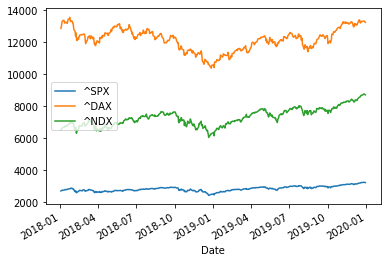

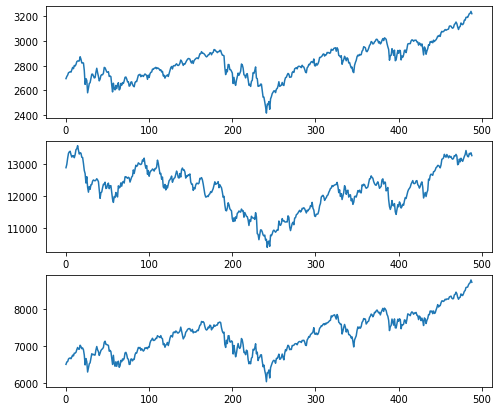

In [97]:
df.plot()

def plotMatrix(s, title=''):
    n1,n2 = s.shape
    if n1 < n2:
        s = s.T
    n1, n = s.shape
    x = np.arange(n1)
    fig, ax = plt.subplots(figsize=(8, 7))    
    for i in range(n):        
        plt.subplot(n*100 + 11 + i)
        plt.plot(x, s[:, i])
    plt.title(title, loc='center', pad=-115)
    plt.title(title, loc='center', y=-0.3)
    return plt

plotMatrix(df.values)
